# Question 1: How do the sizes of intervals affect the uncertainty of the y-intercept in a linear fit?



In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

In [165]:
plt.rcParams["figure.figsize"] = (10,15)

figure2, axis = plt.subplots(10, 1)
plt.close(figure2)

# Function to fill in the subplots through the loop later in the code
def plotn(n):
  plotn = plt.subplot2grid((10, 1), (n,0), rowspan=1, colspan=1)
  return plotn

In [166]:
# Necessary functions pulled from P201_functions

def linearfitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

def linear_fit_plot_errors_core(xi,yi,sigmai,labelstring="Linear Fit",linestring="r-",plot_name=plt):

    linestring2 = linestring+"-"
    
    init_vals = [0.0 for x in range(2)]
    popt, pcov = curve_fit(linearfitfunction,xi,yi,p0=init_vals,sigma=sigmai)
    perr = np.sqrt(np.diag(pcov))

    ps = np.random.multivariate_normal(popt,pcov,10000)
    ysample=np.asarray([linearfitfunction(xi,*pi) for pi in ps])

    lower = np.percentile(ysample,2.5,axis=0)
    upper = np.percentile(ysample,97.5,axis=0)
    middle = (lower+upper)/2.0

    print("%s: Coefficients (from curve_fit)" % labelstring)
    print (popt)
    print("%s: Covariance Matrix (from curve_fit)" % labelstring)
    print (pcov)

    print()
    print ("%s: Final Result: y = (%0.5f +/- %0.5f) x + (%0.5f +/- %0.5f)" % (labelstring,popt[1],perr[1],popt[0],perr[0]))
    print()

    #plt.plot(xi,yi,'o')

    plot_name.plot(xi,middle,linestring,label=labelstring,linewidth=1)
    plot_name.plot(xi,lower,linestring2,linewidth=1)
    plot_name.plot(xi,upper,linestring2,linewidth=1)

    return popt[0],popt[1],perr[0],perr[1]

def linear_fit_plot_errors(xi,yi,sigmai,plot_name,x_low="",x_high="",labelstring="Linear Fit",linestring="r-"):
    """
    linear_fit_plot_errors(xi,yi,sigmai,plot_name,x_low="",x_high="",labelstring="Linear Fit",linestring="r-")
    
    Fits a set of (x,y) data, with errors on the y values, with a linear function, y = mx + b.
    
    Arguments:
        xi: array of x values
        yi: array of y values
        sigmai: array of errors in the y values
        plot_name: matlibpolot.pylot plot name
        x_low: lower x limit of fit (optional)
        x_high: upper x limit of fit (optional)
        label_string: Label for plotted data (optional)
        line_string: Python plotting code for plot symbol and color (optional)
    Returns:
        y-intercept, slope, error in y-intercept, error in slope
    """
    if x_low=="":
        # Takes the x and y values to make a trendline
        intercept,slope,dintercept,dslope = linear_fit_plot_errors_core(xi,yi,sigmai,labelstring,linestring)
        return intercept,slope,dintercept,dslope
    else:
        if x_high=="":
            print ('Missing x_high parameter!!')
            return -1000,-1000,-1000,-1000
        else:
            x_data_cut = []
            y_data_cut = []
            sigmai_cut = []
            for i in range(len(xi)):
                if xi[i]>=float(x_low) and xi[i]<=float(x_high):
                    x_data_cut.append(xi[i])
                    y_data_cut.append(yi[i])
                    sigmai_cut.append(sigmai[i])
            x_data_cut = np.array(x_data_cut)
            y_data_cut = np.array(y_data_cut)
            sigmai_cut = np.array(sigmai_cut)
            # Takes the x and y values to make a trendline
            intercept,slope,dintercept,dslope = linear_fit_plot_errors_core(x_data_cut,y_data_cut,sigmai_cut,labelstring,linestring,plot_name)
            return intercept,slope,dintercept,dslope

# Lets start with a small interval, keep the lower value constant, and then make it bigger with each step, and look at the uncertainties as a result

Linear Fit: Coefficients (from curve_fit)
[0.24369737 0.62088969]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.13782883 -0.11108441]
 [-0.11108441  0.09450475]]

Linear Fit: Final Result: y = (0.62089 +/- 0.30742) x + (0.24370 +/- 0.37125)

Linear Fit: Coefficients (from curve_fit)
[0.23941786 0.76636724]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.11497936 -0.05573407]
 [-0.05573407  0.02887803]]

Linear Fit: Final Result: y = (0.76637 +/- 0.16994) x + (0.23942 +/- 0.33909)

Linear Fit: Coefficients (from curve_fit)
[0.2445094  0.82928172]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.10860634 -0.03765888]
 [-0.03765888  0.01401526]]

Linear Fit: Final Result: y = (0.82928 +/- 0.11839) x + (0.24451 +/- 0.32955)

Linear Fit: Coefficients (from curve_fit)
[0.24519804 0.86628079]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.10479099 -0.02832108]
 [-0.02832108  0.00823567]]

Linear Fit: Final Result: y = (0.86628 +/- 0.09075) x + (0.24520 +/- 0.32371)

Linear F

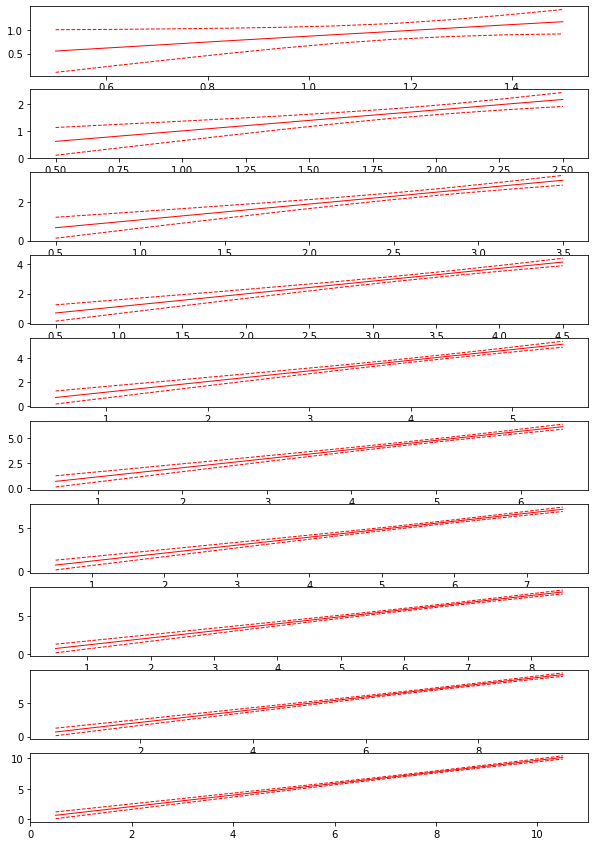

In [160]:

# create some fake data

npts = 10
xlow = 0.5
xhigh = 11.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)

slope = []
dslope = []
yint = []
dyint = []


for n in np.arange(1,11,1):

  xi = np.linspace(xlow,xlow+n,npts)
  yi = xi + yrandom

  sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
  plotn(n-1).errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

  # Takes the x and y values to make a trendline
  m, b, dm, db = linear_fit_plot_errors(xi,yi,sigmai,plotn(n-1),0.0,12.0)

  # Since we are going to be comparing the results of fitting different data sets, create
  # and start to fill some arrays to hold the fit results - (slope +/- dslope), (yint +/ dyint)
  
  slope.append(m)
  dslope.append(dm)
  yint.append(b)
  dyint.append(db)

  n += 1

,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,0.243697,0.371253,0.620890,0.307416
1,0.239418,0.339086,0.766367,0.169935
2,0.244509,0.329555,0.829282,0.118386
3,0.245198,0.323714,0.866281,0.090751
4,0.242432,0.319080,0.890888,0.073439
5,0.237562,0.315047,0.908446,0.061568
6,0.231488,0.311402,0.921583,0.052922
7,0.224758,0.308046,0.931757,0.046347
8,0.217712,0.304922,0.939851,0.041182
9,0.210558,0.301993,0.946428,0.037019


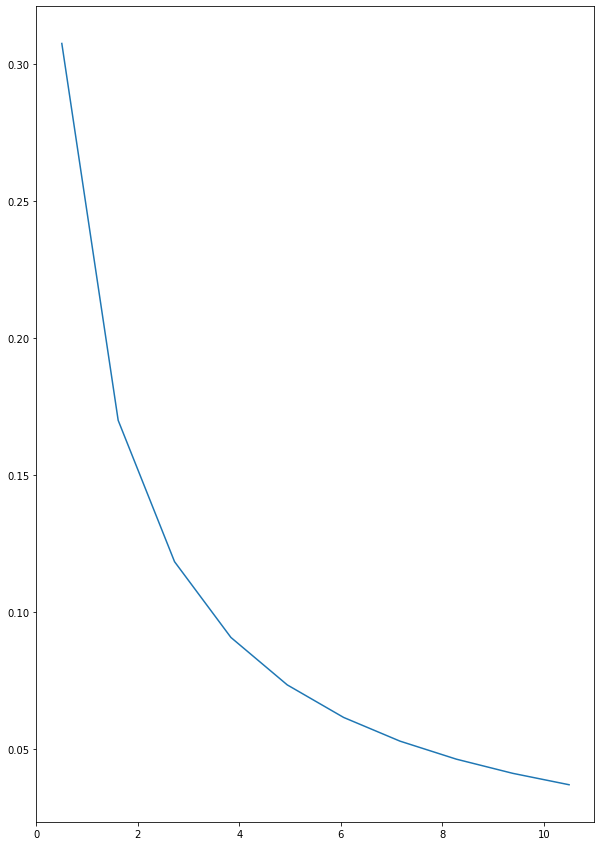

In [161]:
df = pd.DataFrame({'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)
display(df)

plt.plot(xi,dyint)

# Now lets start with a small interval, keep the higher value constant, and then make it bigger with each step, and look at the uncertainties as a result

Linear Fit: Coefficients (from curve_fit)
[1.04783732 0.90908228]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 3.08488537 -0.27993711]
 [-0.27993711  0.02542413]]

Linear Fit: Final Result: y = (0.90908 +/- 0.15945) x + (1.04784 +/- 1.75638)

Linear Fit: Coefficients (from curve_fit)
[0.48781803 0.9580635 ]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.70732775 -0.06682948]
 [-0.06682948  0.00633716]]

Linear Fit: Final Result: y = (0.95806 +/- 0.07961) x + (0.48782 +/- 0.84103)

Linear Fit: Coefficients (from curve_fit)
[0.29929108 0.9747678 ]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.2903148  -0.02846399]
 [-0.02846399  0.00281544]]

Linear Fit: Final Result: y = (0.97477 +/- 0.05306) x + (0.29929 +/- 0.53881)

Linear Fit: Coefficients (from curve_fit)
[0.20297164 0.98348597]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.1523333  -0.01542946]
 [-0.01542946  0.00158906]]

Linear Fit: Final Result: y = (0.98349 +/- 0.03986) x + (0.20297 +/- 0.39030)

Linear F

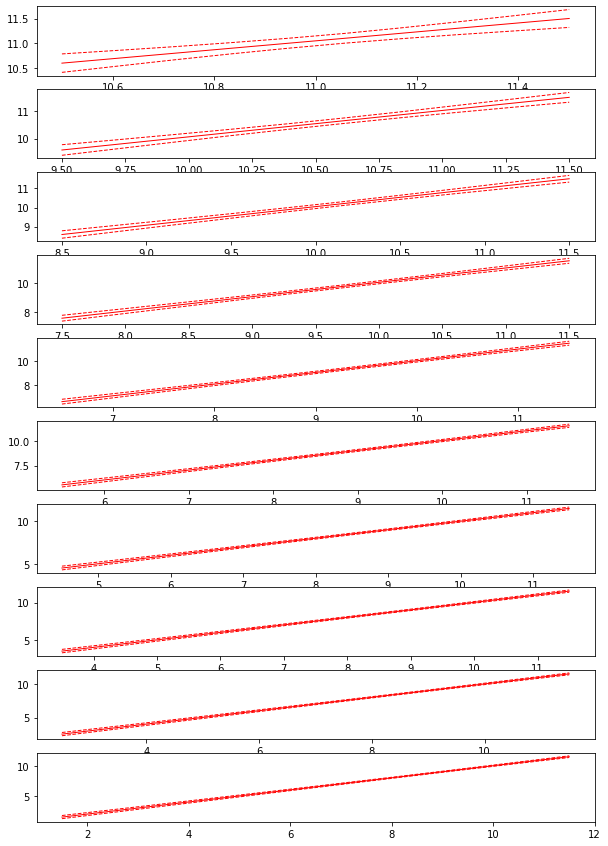

In [162]:
# create some fake data

npts = 10
xlow = 0.5
xhigh = 11.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)

slope = []
dslope = []
yint = []
dyint = []


for n in np.arange(1,11,1):

  xi = np.linspace(xhigh-n,xhigh,npts)
  yi = xi + yrandom

  sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
  plotn(n-1).errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

  # Takes the x and y values to make a trendline
  m, b, dm, db = linear_fit_plot_errors(xi,yi,sigmai,plotn(n-1),0.0,12.0)

  # Since we are going to be comparing the results of fitting different data sets, create
  # and start to fill some arrays to hold the fit results - (slope +/- dslope), (yint +/ dyint)
  
  slope.append(m)
  dslope.append(dm)
  yint.append(b)
  dyint.append(db)
  
  n += 1

,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,1.047837,1.756384,0.909082,0.159449
1,0.487818,0.841028,0.958064,0.079606
2,0.299291,0.538809,0.974768,0.053061
3,0.202972,0.390299,0.983486,0.039863
4,0.142739,0.303684,0.989105,0.032031
5,0.099544,0.248437,0.993291,0.026914
6,0.064761,0.211553,0.996809,0.023388
7,0.033477,0.186616,1.000105,0.020904
8,0.002304,0.170112,1.003498,0.019170
9,-0.030778,0.159834,1.007178,0.018011


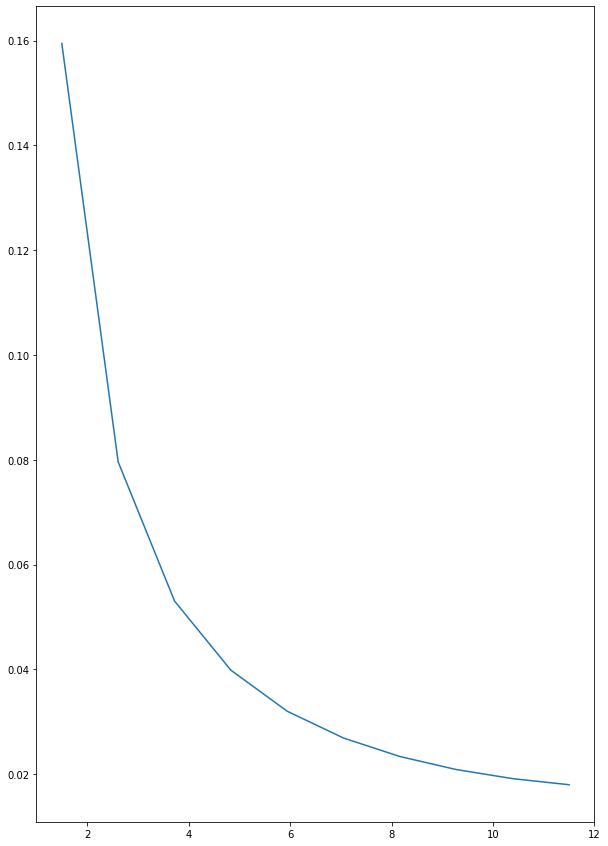

In [163]:
df = pd.DataFrame({'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)
display(df)

plt.plot(xi,dyint)

# In both cases, we can see that the larger the interval, regardless of the amount of points, the lower our uncertainties become. This makes sense for a quantity like the y-intercept where a longer "lever arm" so to speak would give us a more accurate value in a linear case.